# Box pendulum
- This is modelling for the rotary pendulum
- mP is the mass of the pendulum
- mA is the mass of the Arm
- $\theta$ is the angle made by the arm from the principal axis
- $\alpha$ is the angle made by the pendulum from the z axis of the arm

In [1]:
# Rotation matrices
import sympy as sym

def Rot1(th):   # Rotation from base to Arm 
    A = sym.Matrix([
    [ sym.cos(th), sym.sin(th), 0],
    [-sym.sin(th), sym.cos(th), 0],
    [           0,           0, 1]
    ])
    return A

def Rot2(th): #Rotation from Arm to Pen, axes is dodgy
    A = sym.Matrix([
        [0, sym.sin(th), -sym.cos(th)],
        [0, sym.cos(th),  sym.sin(th)],
        [1,           0,            0]
    ])
    return A

In [2]:
# Imports
#import sympy as sym
import numpy as np
from IPython.display import display #for pretty printing

In [3]:
# create symbolic variables

# system parameters
X0,Y0, Z0 = sym.symbols(['X0','Y0', 'Z0']) # fixed position of Arm
g = sym.symbols('g')
mP,mA = sym.symbols(['mP','mA']) # mass of links
La,Lp = sym.symbols(['la','lp']) # length of links
InA,InP = sym.symbols(['InA','InP']) # moment of intertia of links

# generalized coordinates
th,alph = sym.symbols(['\\theta','\\alpha']) #position
dth,dalph = sym.symbols(['\\dot{\\theta}','\\dot{\\alpha}']) #velocity
ddth,ddalph = sym.symbols(['\\ddot{\\theta}','\\ddot{\\alpha}']) #acceleration

q = sym.Matrix([[th],[alph]]) #group into matrices
dq = sym.Matrix([[dth],[dalph]])
ddq = sym.Matrix([[ddth],[ddalph]])

display(ddq) #display prints it as cool latex stuff
## Rotation matrices
R1 = Rot1(th)
R2 = Rot2(alph)
display(R1,R2)

Matrix([
[\ddot{\theta}],
[\ddot{\alpha}]])

Matrix([
[ cos(\theta), sin(\theta), 0],
[-sin(\theta), cos(\theta), 0],
[           0,           0, 1]])

Matrix([
[0, sin(\alpha), -cos(\alpha)],
[0, cos(\alpha),  sin(\alpha)],
[1,           0,            0]])

## Positions

In [8]:
# STEP 1: write expressions for the system space coordinates in terms of the generalized coordinates and parameters
##### Arm is at the origin so no need for X0 and Y0
r_Hub = sym.Matrix([0, 0, 0])
r_Arm_1 = sym.Matrix([La/2, 0, 0])
r_Arm = R10*r_Arm_1

r_Pen_2 = sym.Matrix([0, 0, Lp/2])
r_Pen = R20*r_Pen_2+r_Arm*2

display(r_Arm, r_Pen)

Matrix([
[la*cos(\theta)/2],
[la*sin(\theta)/2],
[               0]])

Matrix([
[la*cos(\theta) + lp*sin(\alpha)*sin(\theta)/2],
[la*sin(\theta) - lp*sin(\alpha)*cos(\theta)/2],
[                             lp*cos(\alpha)/2]])

## Velocities

### Linear velocities

In [30]:
# STEP 2: generate expressions for the system space velocities
dr_Arm = sym.simplify(r_Arm.jacobian(q)*dq)
dr_Pen = sym.simplify(r_Pen.jacobian(q)*dq)
#display(dr_Arm,dr_Pen)

wArm = sym.Matrix([0, 0, dth])
drArm = sym.Matrix([0, La*dth, 0])

wPen  = sym.Matrix([-sym.cos(alph)*dth, sym.sin(alph)*dth, dalph])
drPen =
display(drArm)

Matrix([
[              0],
[\dot{\theta}*la],
[              0]])

### Angular velocities

In [5]:
wArm = sym.Matrix([0, 0, dth])
#wPen = sym.Matrix([dalph, dth*sym.sin(alph), dth*sym.cos(alph)])
wPen = sym.Matrix([-sym.cos(alph)*dth, dth*sym.sin(alph), dalph])
#wArm = wPen
display(wArm,wPen)

Matrix([
[           0],
[           0],
[\dot{\theta}]])

Matrix([
[-\dot{\theta}*cos(\alpha)],
[ \dot{\theta}*sin(\alpha)],
[             \dot{\alpha}]])

## Lagrange

In [6]:
# STEP 3: generate expressions for the kinetic and potential energy
## Kinetic energies
Thub = 0
TArm = (0.5*mA*dArm.T*dArm) + (0.5*InA*wArm.T*wArm)
TPen = (0.5*mP*dPen.T*dPen) + (0.5*InP*wPen.T*wPen)
T = sym.Matrix([sym.simplify(TArm + TPen)])
display(T)
#T = sym.Matrix([0.5*mA*(dxArm**2+dyArm**2) + 0.5*mP*(dxPen**2+dyPen**2) + 0.5*InA*dth**2 + 0.5*InP*dalph**2])

## Potential energies
VArm = 0
VHub = 0
VPen = mP*g*zPen
V = sym.Matrix([sym.simplify(VArm + VHub + VPen)])
display(V)

Matrix([[0.5*InA*\dot{\theta}**2 + 0.5*InP*\dot{\alpha}**2 + 0.5*InP*\dot{\theta}**2 + 0.125*\dot{\alpha}**2*lp**2*mP - 0.5*\dot{\alpha}*\dot{\theta}*la*lp*mP*cos(\alpha) + 0.125*\dot{\theta}**2*la**2*mA + 0.5*\dot{\theta}**2*la**2*mP + 0.125*\dot{\theta}**2*lp**2*mP*sin(\alpha)**2]])

Matrix([[g*mP*(2*Z0 + lp*cos(\alpha))/2]])

In [7]:
# STEP 4: calculate each term of the Lagrange equation
# term 1
Lg1 = sym.zeros(1,len(q))
for i in range(len(q)):
    dT_ddq = sym.diff(T,dq[i]) # get partial of T in dq_i
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq #...then get time derivative of that partial

# term 3
Lg3 = T.jacobian(q) # partial of T in q

# term 4
Lg4 = V.jacobian(q) # partial of U in q

#combine
EOM = sym.simplify(Lg1 - Lg3 + Lg4)

display(EOM) #<-this will give you an idea of the magnitude of the faff a decent symbolic package lets you avoid

Matrix([[-0.5*\ddot{\alpha}*la*lp*mP*cos(\alpha) + \ddot{\theta}*(1.0*InA + 1.0*InP + 0.25*la**2*mA + 1.0*la**2*mP + 0.25*lp**2*mP*sin(\alpha)**2) + 0.5*\dot{\alpha}*lp*mP*(\dot{\alpha}*la + \dot{\theta}*lp*cos(\alpha))*sin(\alpha), \ddot{\alpha}*(1.0*InP + 0.25*lp**2*mP) - 0.5*\ddot{\theta}*la*lp*mP*cos(\alpha) - 0.125*\dot{\theta}**2*lp**2*mP*sin(2*\alpha) - g*lp*mP*sin(\alpha)/2]])

# Test

In [8]:
#initial conditions
th0 = 0
alph0 = 0
dth0 = 0
dalph0 = 0

h = 0.01

#parameters
X0val = 0
Y0val = 0
Laval = 1
Lpval = 1

parameter_values = [(X0,X0val),(Y0,Y0val),(g,9.81),(mA,1),(mP,1),(La,Laval),(Lp,Lpval),(InA,0.08),(InP,0.08)]

thar = [th0]
alphar = [alph0]
dthar = [dth0]
dalphar = [dalph0]

N = 100
for i in range(1,N):
    # substitute parameter values and previous conditions into the EOM 
    past = [(th,thar[i-1]),(alph,alphar[i-1]),(dth,dthar[i-1]),(dalph,dalphar[i-1])]
    EOM_sub = EOM.subs(parameter_values).subs(past)
    #display(past)
    # solve for the acceleration
    acc = sym.solve(EOM_sub,[ddth, ddalph])
    
    # integrate for the next velocity and position
    dthar.append(float(dthar[i-1]+h*acc[ddth]))
    dalphar.append(float(dalphar[i-1]+h*acc[ddalph]))
    thar.append(float(thar[i-1]+h*dthar[i]))
    alphar.append(float(alphar[i-1]+h*dalphar[i]))

print(thar)

[0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


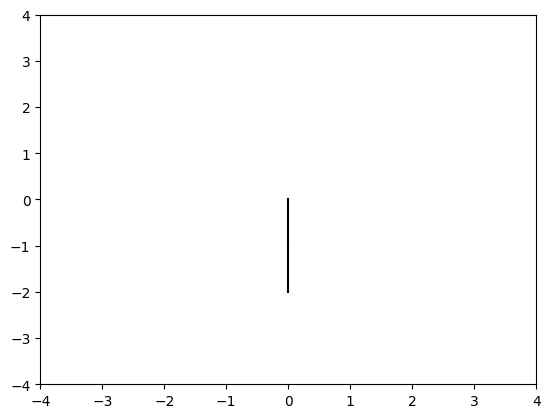

In [9]:
#animate it
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

fig1, ax1 = plt.subplots(1,1) #create axes

def plot_pendulum(i,th_in,alph_in,ax): #update function for animation
    ax.clear()
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    
    #plot link 1
    Latopx = X0val
    Latopy = Y0val
    Labottomx = X0val + Laval*np.sin(th_in[i])
    Labottomy = Y0val - Laval*np.cos(th_in[i])
    ax.plot([Latopx,Labottomx],[Latopy,Labottomy],color='xkcd:black')
    
    #plot link 2
    Lpbottomx = Labottomx + Lpval*np.sin(th_in[i] + alph_in[i])
    Lpbottomy = Labottomy - Lpval*np.cos(th_in[i] + alph_in[i]) 
    ax.plot([Labottomx,Lpbottomx],[Labottomy,Lpbottomy],color='xkcd:black')
    
update = lambda i: plot_pendulum(i,thar,alphar,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(N),interval = 50,repeat=True)

HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
import numpy as np

%matplotlib inline

fig1, ax1 = plt.subplots(1, 1)  # create axes

def plot_pendulum(i, th_in, alph_in, ax):  # update function for animation
    ax.clear()
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    
    # Debug: Print current angles
    print(f"Frame {i}: th = {th_in[i]}, alpha = {alph_in[i]}")

    # plot link 1
    Latopy = Y0val
    Latopz = X0val
    Labottomz = X0val + Laval * np.sin(th_in[i])
    Labottomy = Y0val - Laval * np.cos(th_in[i])
    ax.plot([Latopz, Labottomz], [Latopy, Labottomy], color='xkcd:black')
    
    # plot link 2
    Lpbottomz = Labottomz + Lpval * np.sin(th_in[i] + alph_in[i])
    Lpbottomy = Labottomy - Lpval * np.cos(th_in[i] + alph_in[i]) 
    ax.plot([Labottomz, Lpbottomz], [Labottomy, Lpbottomy], color='xkcd:black')

update = lambda i: plot_pendulum(i, thar, alphar, ax1)  # lambdify update function

# Create animation
animate = ani.FuncAnimation(fig1, update, frames=range(N), interval=50, repeat=True)

# Display animation
plt.close(fig1)  # Prevents static display of the last frame
HTML(animate.to_html5_video())  # Convert the animation to HTML5 to embed it in the notebook


Frame 0: th = 0.7853981633974483, alpha = 0
Frame 0: th = 0.7853981633974483, alpha = 0
Frame 1: th = 0.7853981633974483, alpha = 0.0
Frame 2: th = 0.7853981633974483, alpha = 0.0
Frame 3: th = 0.7853981633974483, alpha = 0.0
Frame 4: th = 0.7853981633974483, alpha = 0.0
Frame 5: th = 0.7853981633974483, alpha = 0.0
Frame 6: th = 0.7853981633974483, alpha = 0.0
Frame 7: th = 0.7853981633974483, alpha = 0.0
Frame 8: th = 0.7853981633974483, alpha = 0.0
Frame 9: th = 0.7853981633974483, alpha = 0.0
Frame 10: th = 0.7853981633974483, alpha = 0.0
Frame 11: th = 0.7853981633974483, alpha = 0.0
Frame 12: th = 0.7853981633974483, alpha = 0.0
Frame 13: th = 0.7853981633974483, alpha = 0.0
Frame 14: th = 0.7853981633974483, alpha = 0.0
Frame 15: th = 0.7853981633974483, alpha = 0.0
Frame 16: th = 0.7853981633974483, alpha = 0.0
Frame 17: th = 0.7853981633974483, alpha = 0.0
Frame 18: th = 0.7853981633974483, alpha = 0.0
Frame 19: th = 0.7853981633974483, alpha = 0.0
Frame 20: th = 0.78539816339